# Dynamic Aperture for HL-LHC

## Introduction

One strategic upgrade for HL-LHC is the installation of additional collimators (TCLD) in the dispersion suppressor region of the collimation insertion IR7. This is typically the location in which the highest collimation losses are observed and simulated (particles scattered out of the LHC collimation system). The concerned area is equipped with the superconducing LHC dipoles, hence the required space for the installation of the TCLD collimators is not available. Therefore, the proposed solution includes the replacement of the 15m long main dipoles (MB) with a nominal magnetic field of 8.3T by shorter dipoles (MBH) with a nominal magnetic field of 11T and 5.5m length. 

<img src="deps/tcld.png">

The nominal baseline is to replace the MB.B8R7 on the right hand side by two MBH units MBH.A8R7/MBH.B8R7 and equivalently the MBH.B8L7 at the left hand side of IR7. In between the two new magnets the TCLD collimator is supposed to be installed. A commonly studied scenario, which is not the present HL-LHC baseline, also includes the replacement of the MBH.A10R7/MBH.A10L7 in addition. Furthermore, the collimation simulations, in paricular for heavy-ions, show that a shifing of the TCLD collimators could be advantageous (see [[1]]). 

Magnetic field errors of the MBH dipoles may affect the dynamic aperture (DA) or introduce $\beta$-beating. This notebook analyzes these effects that were studied by means of dynamic aperture simulations using SixTrack via BOINC and optics simulations using MAD-X. The errortable used for the simulations can be found in:
    
    /afs/cern.ch/eng/lhc/optics/HLLHCV1.0/errors2/MBH_errortable_v2

[1]: https://indico.cern.ch/event/646799/contributions/2627224/attachments/1478327/2291048/colUSM170616_PH.pdf

## Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

import sixdesk.da as da

sixdbdir = '/home/phermes/development/SixDeskDB/'

## Dynamic Aperture at Injection/Collision

Define the names of the studies to be analyzed:

In [125]:
studies_template = 'HLLHC_{0}_B_{1}_MBH10M_{2}'
studies          = []
for _mode in ['inj','col']:
    for _beam in ['1','4']:
        for _mbh in ['-1','0','1']:
            studies.append(studies_template.format(_mode,_beam,_mbh))

Load the data from the studies into a dictionary

In [126]:
data = {}
for _study in studies:
    data[_study] = da.davsang(_study, directory = '/home/phermes/development/SixDeskDB/')

In [127]:
tcld = {'-1': "Conf. 1", "0": "Conf. 2", "1": "Conf. 3"}

Plot and compare the data

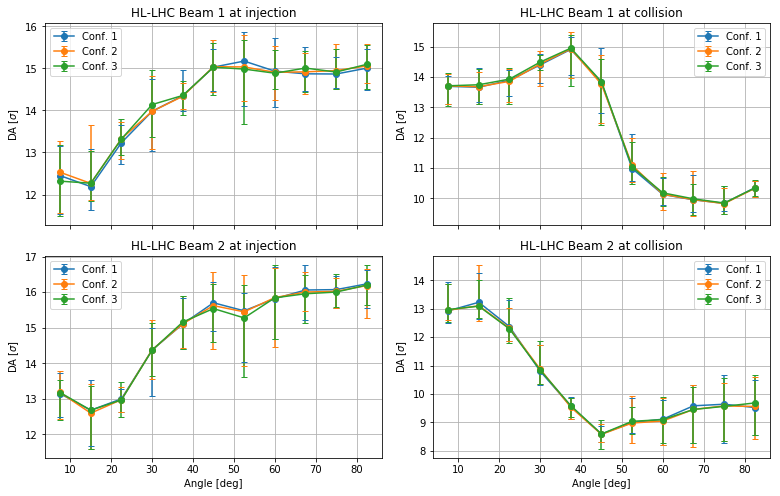

In [128]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharex=True,figsize=[13,8])

for _key in data.keys():
    if 'inj' in _key and 'B_1' in _key:
        ax    = ax1
        label = _key.split('_')[-1]
        
    elif 'col' in _key and 'B_1' in _key:
        ax = ax2
        label = _key.split('_')[-1]
    elif 'inj' in _key and 'B_4' in _key:
        ax = ax3
        label = _key.split('_')[-1]
    elif 'col' in _key and 'B_4' in _key:
        ax = ax4
        label = _key.split('_')[-1]
    
    data[_key].plotDA(axis=ax,label=tcld[label])
    
ax1.set_title('HL-LHC Beam 1 at injection')
ax2.set_title('HL-LHC Beam 1 at collision')
ax3.set_title('HL-LHC Beam 2 at injection')
ax4.set_title('HL-LHC Beam 2 at collision')   

for ax in fig.get_axes():
    ax.grid()
    ax.legend()
    
ax1.set_xlabel('')
ax2.set_xlabel('')
 
plt.subplots_adjust(wspace=0.15, hspace=0.15)
plt.savefig('output/HLLHC_DA_MBH.pdf',bbox_inches='tight')
plt.show()

In [31]:
def get_da_summary(string):
    d  = data[string]
    da = d.dynap['da']
    print(string, da.min(),da.mean(), da.max() )
#     print("{}\n DA [MIN/MAX] {1}/{2}".format(string, d.dynap['da'].min(), d.dynap['ap'].max() ) )

In [32]:
get_da_summary('HLLHC_col_B_1_MBH10M_-1')
get_da_summary('HLLHC_col_B_1_MBH10M_0')
get_da_summary('HLLHC_col_B_1_MBH10M_1')

HLLHC_col_B_1_MBH10M_-1 9.54529867448 12.33361329541454 15.3343225267
HLLHC_col_B_1_MBH10M_0 9.42084997202 12.340013919299365 15.4847702643
HLLHC_col_B_1_MBH10M_1 9.44006079991 12.372132076311978 15.388954433


In [123]:
def get_min_da_evolution(string):
    d = data[string]
    newdata = []
    for angle in d.dynap['angle'].unique():
        dd = d.dynap
        dd = dd[dd['angle']==angle]
        newdata.append([angle,dd['da'].min()])
    newdata = pd.DataFrame(newdata,columns=['angle','minda'])
    return newdata

In [132]:
newdata = {}
for _key in data.keys():
    newdata[_key] = get_min_da_evolution(_key)

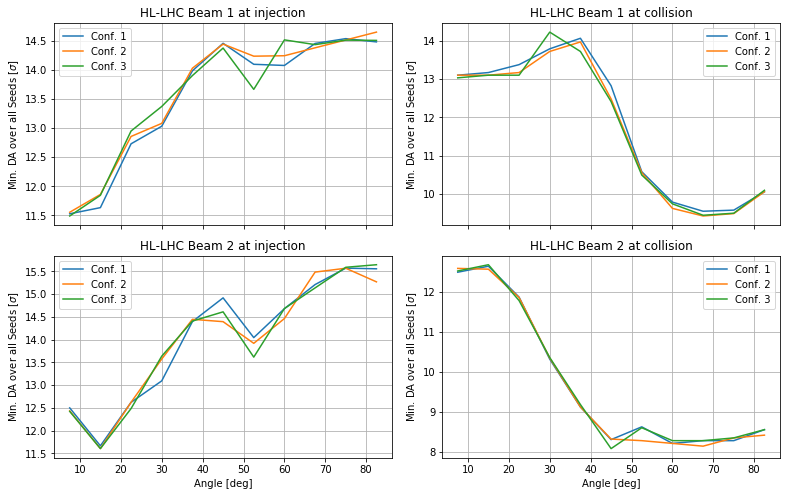

In [130]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharex=True,figsize=[13,8])

for _key in data.keys():
    if 'inj' in _key and 'B_1' in _key:
        ax    = ax1
        label = _key.split('_')[-1]
        
    elif 'col' in _key and 'B_1' in _key:
        ax = ax2
        label = _key.split('_')[-1]
    elif 'inj' in _key and 'B_4' in _key:
        ax = ax3
        label = _key.split('_')[-1]
    elif 'col' in _key and 'B_4' in _key:
        ax = ax4
        label = _key.split('_')[-1]
    
    newdata = get_min_da_evolution(_key)
    ax.plot(newdata['angle'], newdata['minda'], label=tcld[label])
#     data[_key].plotDA(axis=ax,label=tcld[label])
    
ax1.set_title('HL-LHC Beam 1 at injection')
ax2.set_title('HL-LHC Beam 1 at collision')
ax3.set_title('HL-LHC Beam 2 at injection')
ax4.set_title('HL-LHC Beam 2 at collision')   

for ax in fig.get_axes():
    ax.set_xlabel('Angle [deg]')
    ax.set_ylabel(r'Min. DA over all Seeds [$\sigma$]')
    ax.grid()
    ax.legend()
    
ax1.set_xlabel('')
ax2.set_xlabel('')
 
plt.subplots_adjust(wspace=0.15, hspace=0.15)
plt.savefig('output/HLLHC_minDA_MBH.pdf',bbox_inches='tight')
plt.show()

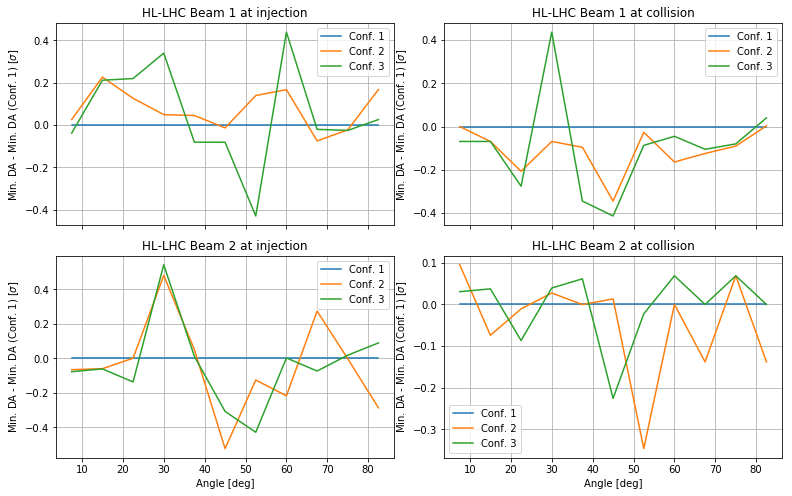

In [140]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharex=True,figsize=[13,8])

ref1 = newdata['HLLHC_inj_B_1_MBH10M_-1']
# ax1.plot()
ax1.plot(ref1['angle'],newdata['HLLHC_inj_B_1_MBH10M_-1']['minda']-ref1['minda'], 
         label='Conf. 1')
ax1.plot(ref1['angle'],-ref1['minda']+newdata['HLLHC_inj_B_1_MBH10M_0']['minda'], 
         label='Conf. 2')
ax1.plot(ref1['angle'],-ref1['minda']+newdata['HLLHC_inj_B_1_MBH10M_1']['minda'], 
         label='Conf. 3')

ref1 = newdata['HLLHC_col_B_1_MBH10M_-1']
# ax1.plot()
ax2.plot(ref1['angle'],newdata['HLLHC_col_B_1_MBH10M_-1']['minda']-ref1['minda'], 
         label='Conf. 1')
ax2.plot(ref1['angle'],-ref1['minda']+newdata['HLLHC_col_B_1_MBH10M_0']['minda'], 
         label='Conf. 2')
ax2.plot(ref1['angle'],-ref1['minda']+newdata['HLLHC_col_B_1_MBH10M_1']['minda'], 
         label='Conf. 3')

ref1 = newdata['HLLHC_inj_B_4_MBH10M_-1']
# ax1.plot()
ax3.plot(ref1['angle'],newdata['HLLHC_inj_B_4_MBH10M_-1']['minda']-ref1['minda'], 
         label='Conf. 1')
ax3.plot(ref1['angle'],-ref1['minda']+newdata['HLLHC_inj_B_4_MBH10M_0']['minda'], 
         label='Conf. 2')
ax3.plot(ref1['angle'],-ref1['minda']+newdata['HLLHC_inj_B_4_MBH10M_1']['minda'], 
         label='Conf. 3')

ref1 = newdata['HLLHC_col_B_4_MBH10M_-1']
# ax1.plot()
ax4.plot(ref1['angle'],newdata['HLLHC_col_B_4_MBH10M_-1']['minda']-ref1['minda'], 
         label='Conf. 1')
ax4.plot(ref1['angle'],-ref1['minda']+newdata['HLLHC_col_B_4_MBH10M_0']['minda'], 
         label='Conf. 2')
ax4.plot(ref1['angle'],-ref1['minda']+newdata['HLLHC_col_B_4_MBH10M_1']['minda'], 
         label='Conf. 3')
    
ax1.set_title('HL-LHC Beam 1 at injection')
ax2.set_title('HL-LHC Beam 1 at collision')
ax3.set_title('HL-LHC Beam 2 at injection')
ax4.set_title('HL-LHC Beam 2 at collision')   

for ax in fig.get_axes():
    ax.set_xlabel('Angle [deg]')
    ax.set_ylabel(r'Min. DA - Min. DA (Conf. 1) [$\sigma$]')
    ax.grid()
    ax.legend()
    
ax1.set_xlabel('')
ax2.set_xlabel('')
 
plt.subplots_adjust(wspace=0.15, hspace=0.15)
plt.savefig('output/HLLHC_minDA_MBH.pdf',bbox_inches='tight')
plt.show()

In [33]:
get_da_summary('HLLHC_inj_B_1_MBH10M_-1')
get_da_summary('HLLHC_inj_B_1_MBH10M_0')
get_da_summary('HLLHC_inj_B_1_MBH10M_1')

HLLHC_inj_B_1_MBH10M_-1 11.5271548883 14.188514820927093 15.8620893931
HLLHC_inj_B_1_MBH10M_0 11.5533616367 14.212496569977231 15.7885741717
HLLHC_inj_B_1_MBH10M_1 11.4890506094 14.210195266184959 15.6679265294


In [35]:
get_da_summary('HLLHC_col_B_4_MBH10M_-1')
get_da_summary('HLLHC_col_B_4_MBH10M_0')
get_da_summary('HLLHC_col_B_4_MBH10M_1')

HLLHC_col_B_4_MBH10M_-1 8.20690757093 10.3948451181559 14.2758869857
HLLHC_col_B_4_MBH10M_0 8.13792441364 10.362554197091184 14.5517491131
HLLHC_col_B_4_MBH10M_1 8.07658570108 10.383878260982742 13.9999763438


In [36]:
get_da_summary('HLLHC_inj_B_4_MBH10M_-1')
get_da_summary('HLLHC_inj_B_4_MBH10M_0')
get_da_summary('HLLHC_inj_B_4_MBH10M_1')

HLLHC_inj_B_4_MBH10M_-1 11.6635623874 14.879508619960989 16.7586304519
HLLHC_inj_B_4_MBH10M_0 11.6036918869 14.853173334485657 16.689657221
HLLHC_inj_B_4_MBH10M_1 11.6024793679 14.83464158873391 16.7721430061


### Conclusions
No significant change observed in the DA.

## Dynamic Aperture During Ramp

The individual field error components change during the ramp. Consider, for example, $b_3$, which is decreasing from roughly -2 to -15. The (absolute maximum) is reached at an early time of the ramp, but not at injection energy. The same applies for the remaining odd $b$ fields.

<img src="deps/fieldquality_full.png">

To study the impact of these field quality errors on dynamic aperture without simulating different steps during the ramp, the DA is simulated at injection energy. The odd $b$ fields are individually set to their (absolute) maximum while maintining the remaining field errors at their injection values. In addition, one simulation is carried out with all $b$ fields at their maximum at the same time. This approach overestimates the effects, because emittance shrinking from adiabatic damping is ignored. 

In [141]:
studies_template = 'HLLHC_ramp_B_{0}_MBH10_{1}_ERR_{2}'
studies          = []

# _beam -    1: Beam 1, 4: Beam 4
# _mbh  -   -1: no MBH magnets; 0: MBH magnets in cell 8R7/8L7; 1: MBH mag. in cells 8 and 10
# _err  -    0: all field errors set to max., !=0: only _err set to max

for _beam in ['1','4']:                      
    for _mbh in ['0', '1']:                  
        for _err in ['0','3','5','7','9']:   
            studies.append(studies_template.format(_beam,_mbh,_err))
            
# manually plug in the reference cases:

studies.append('HLLHC_inj_B_1_MBH10M_-1')
studies.append('HLLHC_inj_B_4_MBH10M_-1')

In [142]:
# read the DA data

data = {}
for _study in studies:
    data[_study] = da.davsang(_study, directory = '/home/phermes/development/SixDeskDB/')

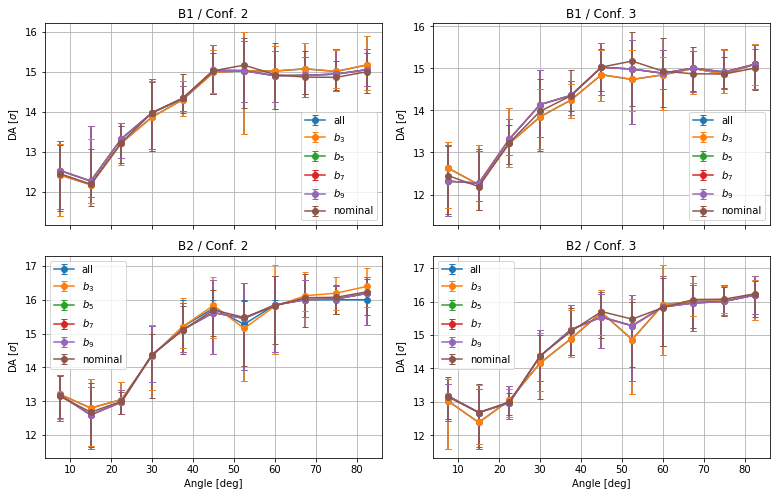

In [164]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharex=True,figsize=[13,8])

for _key in data.keys():
    if 'MBH10_0' in _key and 'B_1' in _key:
        ax = [ax1]
        label = _key.split('_')[-1]
        if label=='0':
            label = 'all'
        else:
            label = r'$b_{0}$'.format(label)
    elif 'MBH10_1' in _key and 'B_1' in _key:
        ax = [ax2]
        label = _key.split('_')[-1]
        if label=='0':
            label = 'all'
        else:
            label = r'$b_{0}$'.format(label)        
    elif 'MBH10_0' in _key and 'B_4' in _key:
        ax = [ax3]
        label = _key.split('_')[-1]
        if label=='0':
            label = 'all'
        else:
            label = r'$b_{0}$'.format(label)          
    elif 'MBH10_1' in _key and 'B_4' in _key:
        ax = [ax4]
        label = _key.split('_')[-1]
        if label=='0':
            label = 'all'
        else:
            label = r'$b_{0}$'.format(label)          
    elif 'inj_B_1' in _key:                          # plot the reference for both cases [MBH10_0 and MBH10_1]
        ax = [ax1, ax2]
        label = 'nominal'
    elif 'inj_B_4' in _key:
        ax = [ax3, ax4]
        label = 'nominal'
        
    for axis in ax:
        data[_key].plotDA(axis=axis,label=label)
    
ax1.set_title('B1 / Conf. 2')
ax2.set_title('B1 / Conf. 3')
ax3.set_title('B2 / Conf. 2')
ax4.set_title('B2 / Conf. 3')
ax1.set_xlabel('')
ax2.set_xlabel('')

for ax in fig.get_axes():
    ax.grid()
    ax.legend()
plt.subplots_adjust(wspace=0.15, hspace=0.15)
plt.savefig('output/HLLHC_DA_MBH_ramp.pdf',bbox_inches='tight')
plt.show()

In [167]:
newdata = {}
for _key in data.keys():
    newdata[_key] = get_min_da_evolution(_key)

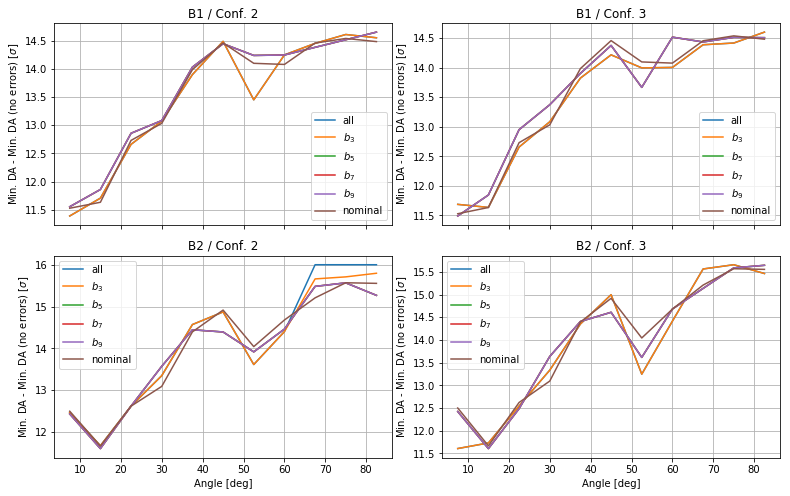

In [165]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharex=True,figsize=[13,8])

for _key in data.keys():
    if 'MBH10_0' in _key and 'B_1' in _key:
        ax = [ax1]
        label = _key.split('_')[-1]
        if label=='0':
            label = 'all'
        else:
            label = r'$b_{0}$'.format(label)
    elif 'MBH10_1' in _key and 'B_1' in _key:
        ax = [ax2]
        label = _key.split('_')[-1]
        if label=='0':
            label = 'all'
        else:
            label = r'$b_{0}$'.format(label)        
    elif 'MBH10_0' in _key and 'B_4' in _key:
        ax = [ax3]
        label = _key.split('_')[-1]
        if label=='0':
            label = 'all'
        else:
            label = r'$b_{0}$'.format(label)          
    elif 'MBH10_1' in _key and 'B_4' in _key:
        ax = [ax4]
        label = _key.split('_')[-1]
        if label=='0':
            label = 'all'
        else:
            label = r'$b_{0}$'.format(label)          
    elif 'inj_B_1' in _key:                          # plot the reference for both cases [MBH10_0 and MBH10_1]
        ax = [ax1, ax2]
        label = 'nominal'
    elif 'inj_B_4' in _key:
        ax = [ax3, ax4]
        label = 'nominal'
    
    for a in ax:
        newdata = get_min_da_evolution(_key)
        a.plot(newdata['angle'], newdata['minda'],label=label)

        
        
        
ax1.set_title('B1 / Conf. 2')
ax2.set_title('B1 / Conf. 3')
ax3.set_title('B2 / Conf. 2')
ax4.set_title('B2 / Conf. 3')
ax1.set_xlabel('')
ax2.set_xlabel('')

for ax in fig.get_axes():
    ax.set_xlabel('Angle [deg]')
    ax.set_ylabel(r'Min. DA - Min. DA (no errors) [$\sigma$]')
    ax.grid()
    ax.legend()
# plt.subplots_adjust(wspace=0.15, hspace=0.15)
ax1.set_xlabel('')
ax2.set_xlabel('')

plt.subplots_adjust(wspace=0.15, hspace=0.15)
plt.savefig('output/HLLHC_minDA_MBH_ramp.pdf',bbox_inches='tight')
plt.show()

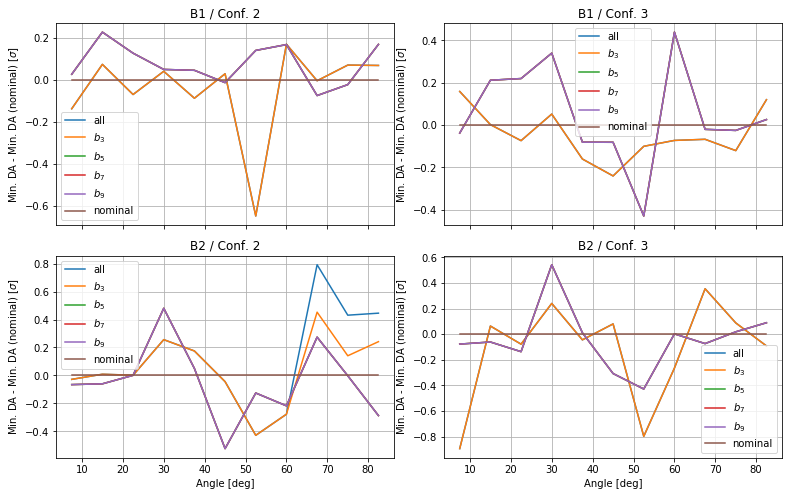

In [223]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2, 2, sharex=True,figsize=[13,8])

# ax1.plot()
ref = newdata['HLLHC_inj_B_1_MBH10M_-1']

ax1.plot(ref['angle'], -ref['minda']+newdata['HLLHC_ramp_B_1_MBH10_0_ERR_0']['minda'],
         label='all')
ax1.plot(ref['angle'], -ref['minda']+newdata['HLLHC_ramp_B_1_MBH10_0_ERR_3']['minda'], 
         label=r'$b_3$')
ax1.plot(ref['angle'], -ref['minda']+newdata['HLLHC_ramp_B_1_MBH10_0_ERR_5']['minda'], 
         label=r'$b_5$')
ax1.plot(ref['angle'], -ref['minda']+newdata['HLLHC_ramp_B_1_MBH10_0_ERR_7']['minda'], 
         label=r'$b_7$')
ax1.plot(ref['angle'], -ref['minda']+newdata['HLLHC_ramp_B_1_MBH10_0_ERR_9']['minda'], 
         label=r'$b_9$')
ax1.plot(ref['angle'], -ref['minda']+newdata['HLLHC_inj_B_1_MBH10M_-1']['minda'], 
         label='nominal')



lbl = ['all',r'$b_3$',r'$b_5$',r'$b_7$',r'$b_9$']
numbers = [0,3,5,7,9]

ref = newdata['HLLHC_inj_B_1_MBH10M_-1']
tmp = 'HLLHC_ramp_B_1_MBH10_1_ERR_'
for i,n in enumerate(numbers):
    ax2.plot(ref['angle'], -ref['minda']+newdata[tmp+str(numbers[i])]['minda'], 
         label=lbl[i])
ax2.plot(ref['angle'], -ref['minda']+newdata['HLLHC_inj_B_1_MBH10M_-1']['minda'],label='nominal')

ref = newdata['HLLHC_inj_B_4_MBH10M_-1']
tmp = 'HLLHC_ramp_B_4_MBH10_0_ERR_'
for i,n in enumerate(numbers):
    ax3.plot(ref['angle'], -ref['minda']+newdata[tmp+str(numbers[i])]['minda'], 
         label=lbl[i])
ax3.plot(ref['angle'], -ref['minda']+ref['minda'],label='nominal')

ref = newdata['HLLHC_inj_B_4_MBH10M_-1']
tmp = 'HLLHC_ramp_B_4_MBH10_1_ERR_'
for i,n in enumerate(numbers):
    ax4.plot(ref['angle'], -ref['minda']+newdata[tmp+str(numbers[i])]['minda'], 
         label=lbl[i])
ax4.plot(ref['angle'], -ref['minda']+ref['minda'],label='nominal')

# ax1.set_title('HL-LHC Beam 1 at injection')
      
ax1.set_title('B1 / Conf. 2')
ax2.set_title('B1 / Conf. 3')
ax3.set_title('B2 / Conf. 2')
ax4.set_title('B2 / Conf. 3')

for ax in fig.get_axes():
    ax.set_xlabel('Angle [deg]')
    ax.set_ylabel(r'Min. DA - Min. DA (nominal) [$\sigma$]')
    ax.grid()
    ax.legend()
    
ax1.set_xlabel('')
ax2.set_xlabel('')
 
# ax1.set_ylim(-2,0.2)
    
plt.subplots_adjust(wspace=0.15, hspace=0.15)
plt.savefig('output/HLLHC_minDA_MBH.pdf',bbox_inches='tight')
plt.show()

In [219]:
ref = newdata['HLLHC_inj_B_1_MBH10M_-1']

print('x',ref['minda'].min())
for b in [0,3,5,7,9]:
    print(b,newdata['HLLHC_ramp_B_1_MBH10_0_ERR_{0}'.format(b)]['minda'].min(), (-ref['minda']+newdata['HLLHC_ramp_B_1_MBH10_0_ERR_{0}'.format(b)]['minda']).min())

x 11.5271548883
0 11.3894061472 -0.647500831728
3 11.3894061472 -0.647500831728
5 11.5533616367 -0.0750781215893
7 11.5533616367 -0.0750781215893
9 11.5533616367 -0.0750781215893


In [220]:
ref = newdata['HLLHC_inj_B_1_MBH10M_-1']

print('x',ref['minda'].min())
for b in [0,3,5,7,9]:
    print(b,newdata['HLLHC_ramp_B_1_MBH10_1_ERR_{0}'.format(b)]['minda'].min(), (-ref['minda']+newdata['HLLHC_ramp_B_1_MBH10_1_ERR_{0}'.format(b)]['minda']).min())

x 11.5271548883
0 11.6346104439 -0.240966903209
3 11.6346104439 -0.240966903209
5 11.4890506094 -0.430436573724
7 11.4890506094 -0.430436573724
9 11.4890506094 -0.430436573724


In [221]:
ref = newdata['HLLHC_inj_B_4_MBH10M_-1']

print('x',ref['minda'].min())
for b in [0,3,5,7,9]:
    print(b,newdata['HLLHC_ramp_B_4_MBH10_0_ERR_{0}'.format(b)]['minda'].min(), (-ref['minda']+newdata['HLLHC_ramp_B_4_MBH10_0_ERR_{0}'.format(b)]['minda']).min())

x 11.6635623874
0 11.6723855774 -0.428142673669
3 11.6723855774 -0.428142673669
5 11.6036918869 -0.523191723371
7 11.6036918869 -0.523191723371
9 11.6036918869 -0.523191723371


In [222]:
ref = newdata['HLLHC_inj_B_4_MBH10M_-1']

print('x',ref['minda'].min())
for b in [0,3,5,7,9]:
    print(b,newdata['HLLHC_ramp_B_4_MBH10_1_ERR_{0}'.format(b)]['minda'].min(), (-ref['minda']+newdata['HLLHC_ramp_B_4_MBH10_1_ERR_{0}'.format(b)]['minda']).min())

x 11.6635623874
0 11.6034867259 -0.8941197685
3 11.6034867259 -0.8941197685
5 11.6024793679 -0.428451840915
7 11.6024793679 -0.428451840915
9 11.6024793679 -0.428451840915


## $\beta$-beating from $b_2$ field

In collision, the $b_2$ field is rather large (-14.6). Since there is no compensating quadrupole field, this is rather large and has to be studied. An additional quadrupolar field can introduce $\beta$-beating. It is therefore studied how the optics changes w.r.t. the nominal HL-LHC optics when adding MBH magnets into the magnetic lattice. 

Only the $b_2$ error component is included in this study. The study is conducted for both injection and collision. For the moment, we consider only MBH magnets in IR7 cell 8.

### Prepare the analysis

In [2]:
import sixdesk.beta_beat as bb

Specify the directory in which the output data is saved

In [225]:
datadir  = '/afs/cern.ch/work/p/phermes/public/reference/HL-LHC_bb_MBH/twiss_BPM/'   # dir in which data is stored
nametemp = 'HLLHC_B{0}_{1}_MBH{2}_MB{3}_BPM_seed_{4}_ql_{5}.tfs'                     # filename template

Load the reference optics [without any field errors, perfect machine]

In [103]:
datadir  = '/media/phermes/local/170901_MBH_field_errors/B2_in_collision/170801_beta_beat/twiss_BPM/'   # dir in which data is stored
nametemp = 'HLLHC_B{0}_{1}_MBH{2}_MB{3}_BPM_seed_{4}_ql_{5}.tfs'                     # filename template

b1inj = bb.load_twiss('{0}/HLLHC_B1_inj_MBH0_MB0_BPM_seed_1_ql_1.0000.tfs'.format(datadir))
b2inj = bb.load_twiss('{0}/HLLHC_B2_inj_MBH0_MB0_BPM_seed_1_ql_1.0000.tfs'.format(datadir))

b1col = bb.load_twiss('{0}/HLLHC_B1_col_MBH0_MB0_BPM_seed_1_ql_1.0000.tfs'.format(datadir))
b2col = bb.load_twiss('{0}/HLLHC_B2_col_MBH0_MB0_BPM_seed_1_ql_1.0000.tfs'.format(datadir))

Load the optics with the different settings:

    _beam     -  1: Beam 1, 2: Beam 2
    _nrg      -  inj: injection energy & optics, col: collision energy & optics
    _mbh      -  0: MBH field errors off, 1: MBH field errors on
    _mb       -  0: MB  field errors off, 1: MB  field errors on
    _seed     -  seed number

### Injection: Calculate the beta-beating

This definition could be automatized and is slightly brute force, but the number of study cases is very limited.

In [76]:
bb11x, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B1_inj_MBH1_MB1_BPM_seed_{0}_ql_1.0000.tfs',b1inj,'betx')
bb12x, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B1_inj_MBH0_MB1_BPM_seed_{0}_ql_1.0000.tfs',b1inj,'betx')
bb13x, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B1_inj_MBH1_MB0_BPM_seed_{0}_ql_1.0000.tfs',b1inj,'betx')

bb11y, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B1_inj_MBH1_MB1_BPM_seed_{0}_ql_1.0000.tfs',b1inj,'bety')
bb12y, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B1_inj_MBH0_MB1_BPM_seed_{0}_ql_1.0000.tfs',b1inj,'bety')
bb13y, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B1_inj_MBH1_MB0_BPM_seed_{0}_ql_1.0000.tfs',b1inj,'bety')

bb21x, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B2_inj_MBH1_MB1_BPM_seed_{0}_ql_1.0000.tfs',b2inj,'betx')
bb22x, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B2_inj_MBH0_MB1_BPM_seed_{0}_ql_1.0000.tfs',b2inj,'betx')
bb23x, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B2_inj_MBH1_MB0_BPM_seed_{0}_ql_1.0000.tfs',b2inj,'betx')

bb21y, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B2_inj_MBH1_MB1_BPM_seed_{0}_ql_1.0000.tfs',b2inj,'bety')
bb22y, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B2_inj_MBH0_MB1_BPM_seed_{0}_ql_1.0000.tfs',b2inj,'bety')
bb23y, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B2_inj_MBH1_MB0_BPM_seed_{0}_ql_1.0000.tfs',b2inj,'bety')

### Plot the $\beta$-beating

Show the distribution of $\beta$-beating for injection

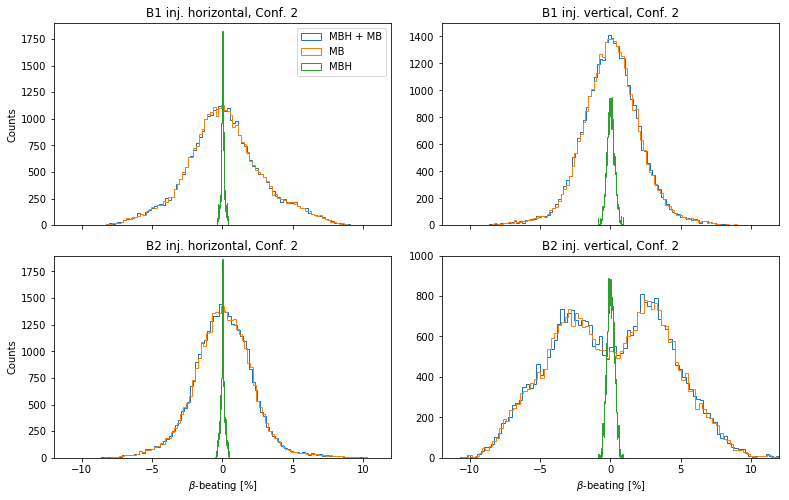

B1 MBH+MB  hor 2.8
B1 MB      hor 2.7
B1 MBH     hor 0.1
B2 MBH+MB  hor 2.2
B2 MB      hor 2.2
B2 MBH     hor 0.2

B1 MBH+MB  ver 2.1
B1 MB      ver 2.1
B1 MBH     ver 0.3
B2 MBH+MB  ver 4.1
B2 MB      ver 4.1
B2 MBH     ver 0.3


In [77]:
# fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, sharex=True,figsize=[10,7])
fig, ((ax1,ax3), (ax2,ax4)) = plt.subplots(2, 2, sharex=True,figsize=[13,8])

conf="Conf. 2"
mode="inj"

ax1.hist(bb11x*100,bins=100,histtype='step',label='MBH + MB')
ax1.hist(bb12x*100,bins=100,histtype='step',label='MB')
ax1.hist(bb13x*100,bins=100,histtype='step',label='MBH')
ax1.set_title('B1 {0}. horizontal, {1}'.format(mode,conf))
ax1.legend()

ax2.hist(bb21x*100,bins=100,histtype='step')
ax2.hist(bb22x*100,bins=100,histtype='step')
ax2.hist(bb23x*100,bins=100,histtype='step')
ax2.set_title('B2 {0}. horizontal, {1}'.format(mode,conf))

ax3.hist(bb11y*100,bins=100,histtype='step')
ax3.hist(bb12y*100,bins=100,histtype='step')
ax3.hist(bb13y*100,bins=100,histtype='step')
ax3.set_title('B1 {0}. vertical, {1}'.format(mode,conf))

ax4.hist(bb21y*100,bins=100,histtype='step')
ax4.hist(bb22y*100,bins=100,histtype='step')
ax4.hist(bb23y*100,bins=100,histtype='step')
ax4.set_title('B2 {0}. vertical, {1}'.format(mode,conf))

for ax in [ax2, ax4]:
    ax.set_xlabel(r'$\beta$-beating [%]')
    
for ax in [ax1, ax2]:
    ax.set_ylabel(r'Counts')
    
ax1.set_xlim(-12,12)
ax2.set_xlim(-12,12)
# ax3.set_xlim(0,1500)
# ax4.set_xlim(0,900)     
    
ax1.set_ylim(0,1900)
ax2.set_ylim(0,1900)    
ax3.set_ylim(0,1500)
ax4.set_ylim(0,1000)    
      
    
plt.subplots_adjust(wspace=0.15, hspace=0.15)
plt.savefig('output/bbeat_injection_conf2.pdf',bbox_inches='tight')
plt.show()

print_summary()

Perform some statistical analysis

In [47]:
def print_summary():
    description = ['B1 MBH+MB', 'B1 MB', 'B1 MBH', 'B2 MBH+MB', 'B2 MB', 'B2 MBH']
    datasets    = [bb11x,bb12x,bb13x,bb21x,bb22x,bb23x]

    for _i in range(len(description)):
        print("{0:10s} hor {1:.1f}".format(description[_i], 100*datasets[_i].std()))

    print('')
    datasets    = [bb11y,bb12y,bb13y,bb21y,bb22y,bb23y]
    description = ['B1 MBH+MB', 'B1 MB', 'B1 MBH', 'B2 MBH+MB', 'B2 MB', 'B2 MBH']

    for _i in range(len(description)):
        print("{0:10s} ver {1:.1f}".format(description[_i], 100*datasets[_i].std()))

## Collision

In [104]:
bb11x, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B1_col_MBH1_MB1_BPM_seed_{0}_ql_1.0000.tfs',b1col,'betx')
bb12x, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B1_col_MBH0_MB1_BPM_seed_{0}_ql_1.0000.tfs',b1col,'betx')
bb13x, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B1_col_MBH1_MB0_BPM_seed_{0}_ql_1.0000.tfs',b1col,'betx')

bb11y, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B1_col_MBH1_MB1_BPM_seed_{0}_ql_1.0000.tfs',b1col,'bety')
bb12y, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B1_col_MBH0_MB1_BPM_seed_{0}_ql_1.0000.tfs',b1col,'bety')
bb13y, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B1_col_MBH1_MB0_BPM_seed_{0}_ql_1.0000.tfs',b1col,'bety')

bb21x, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B2_col_MBH1_MB1_BPM_seed_{0}_ql_1.0000.tfs',b2col,'betx')
bb22x, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B2_col_MBH0_MB1_BPM_seed_{0}_ql_1.0000.tfs',b2col,'betx')
bb23x, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B2_col_MBH1_MB0_BPM_seed_{0}_ql_1.0000.tfs',b2col,'betx')

bb21y, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B2_col_MBH1_MB1_BPM_seed_{0}_ql_1.0000.tfs',b2col,'bety')
bb22y, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B2_col_MBH0_MB1_BPM_seed_{0}_ql_1.0000.tfs',b2col,'bety')
bb23y, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B2_col_MBH1_MB0_BPM_seed_{0}_ql_1.0000.tfs',b2col,'bety')

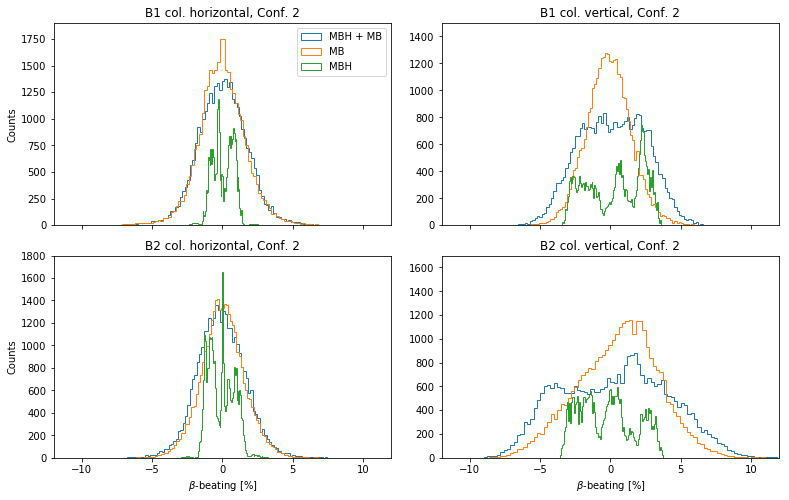

B1 MBH+MB  hor 1.8
B1 MB      hor 1.7
B1 MBH     hor 0.7
B2 MBH+MB  hor 1.7
B2 MB      hor 1.5
B2 MBH     hor 0.9

B1 MBH+MB  ver 2.3
B1 MB      ver 1.6
B1 MBH     ver 2.0
B2 MBH+MB  ver 3.8
B2 MB      ver 2.9
B2 MBH     ver 1.9


In [106]:
# fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, sharex=True,figsize=[10,7])
fig, ((ax1,ax3), (ax2,ax4)) = plt.subplots(2, 2, sharex=True,figsize=[13,8])

conf="Conf. 2"
mode="col"

ax1.hist(bb11x*100,bins=100,histtype='step',label='MBH + MB')
ax1.hist(bb12x*100,bins=100,histtype='step',label='MB')
ax1.hist(bb13x*100,bins=100,histtype='step',label='MBH')
ax1.set_title('B1 {0}. horizontal, {1}'.format(mode,conf))
ax1.legend()

ax2.hist(bb21x*100,bins=100,histtype='step')
ax2.hist(bb22x*100,bins=100,histtype='step')
ax2.hist(bb23x*100,bins=100,histtype='step')
ax2.set_title('B2 {0}. horizontal, {1}'.format(mode,conf))

ax3.hist(bb11y*100,bins=100,histtype='step')
ax3.hist(bb12y*100,bins=100,histtype='step')
ax3.hist(bb13y*100,bins=100,histtype='step')
ax3.set_title('B1 {0}. vertical, {1}'.format(mode,conf))


ax4.hist(bb21y*100,bins=100,histtype='step')
ax4.hist(bb22y*100,bins=100,histtype='step')
ax4.hist(bb23y*100,bins=100,histtype='step')
ax4.set_title('B2 {0}. vertical, {1}'.format(mode,conf))

for ax in [ax2, ax4]:
    ax.set_xlabel(r'$\beta$-beating [%]')
    
for ax in [ax1, ax2]:
    ax.set_ylabel(r'Counts')
    
ax1.set_xlim(-12,12)
ax2.set_xlim(-12,12)

ax1.set_ylim(0,1900)
ax2.set_ylim(0,1800)    
ax3.set_ylim(0,1500)
ax4.set_ylim(0,1700)   
    
plt.subplots_adjust(wspace=0.15, hspace=0.15)
plt.savefig('output/bbeat_collision_conf2.pdf',bbox_inches='tight')
plt.show()
print_summary()

Here, the effect is stronger due to the larger $b_2$ field.

## Configuration 3

In [107]:
datadir  = '/afs/cern.ch/work/p/phermes/private/170922_bbeating/conf3/twiss_BPM/'   # dir in which data is stored
nametemp = 'HLLHC_B{0}_{1}_MBH{2}_MB{3}_BPM_seed_{4}_ql_{5}.tfs'                     # filename template

In [80]:
bb11x, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B1_inj_MBH1_MB1_BPM_seed_{0}_ql_1.0000.tfs',b1inj,'betx')
bb12x, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B1_inj_MBH0_MB1_BPM_seed_{0}_ql_1.0000.tfs',b1inj,'betx')
bb13x, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B1_inj_MBH1_MB0_BPM_seed_{0}_ql_1.0000.tfs',b1inj,'betx')

bb11y, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B1_inj_MBH1_MB1_BPM_seed_{0}_ql_1.0000.tfs',b1inj,'bety')
bb12y, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B1_inj_MBH0_MB1_BPM_seed_{0}_ql_1.0000.tfs',b1inj,'bety')
bb13y, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B1_inj_MBH1_MB0_BPM_seed_{0}_ql_1.0000.tfs',b1inj,'bety')

bb21x, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B2_inj_MBH1_MB1_BPM_seed_{0}_ql_1.0000.tfs',b2inj,'betx')
bb22x, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B2_inj_MBH0_MB1_BPM_seed_{0}_ql_1.0000.tfs',b2inj,'betx')
bb23x, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B2_inj_MBH1_MB0_BPM_seed_{0}_ql_1.0000.tfs',b2inj,'betx')

bb21y, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B2_inj_MBH1_MB1_BPM_seed_{0}_ql_1.0000.tfs',b2inj,'bety')
bb22y, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B2_inj_MBH0_MB1_BPM_seed_{0}_ql_1.0000.tfs',b2inj,'bety')
bb23y, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B2_inj_MBH1_MB0_BPM_seed_{0}_ql_1.0000.tfs',b2inj,'bety')

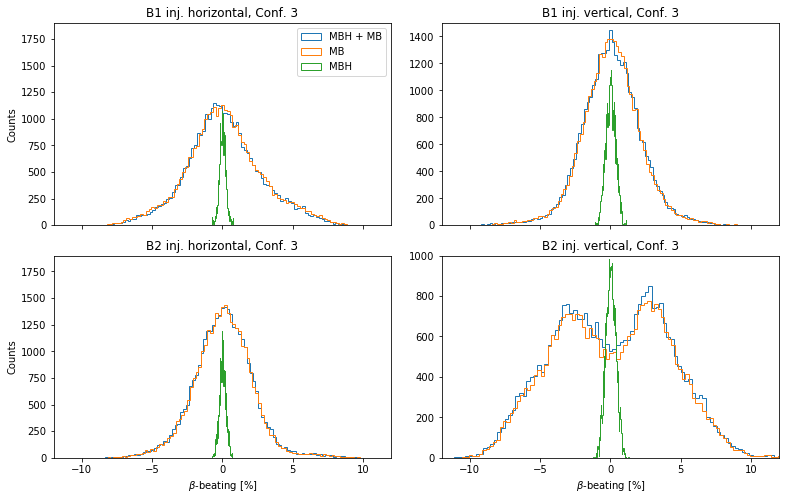

B1 MBH+MB  hor 2.7
B1 MB      hor 2.7
B1 MBH     hor 0.2
B2 MBH+MB  hor 2.1
B2 MB      hor 2.1
B2 MBH     hor 0.2

B1 MBH+MB  ver 2.1
B1 MB      ver 2.1
B1 MBH     ver 0.4
B2 MBH+MB  ver 4.0
B2 MB      ver 4.0
B2 MBH     ver 0.4


In [81]:
# fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, sharex=True,figsize=[10,7])
fig, ((ax1,ax3), (ax2,ax4)) = plt.subplots(2, 2, sharex=True,figsize=[13,8])

conf="Conf. 3"
mode="inj"

ax1.hist(bb11x*100,bins=100,histtype='step',label='MBH + MB')
ax1.hist(bb12x*100,bins=100,histtype='step',label='MB')
ax1.hist(bb13x*100,bins=100,histtype='step',label='MBH')
ax1.set_title('B1 {0}. horizontal, {1}'.format(mode,conf))
ax1.legend()

ax2.hist(bb21x*100,bins=100,histtype='step')
ax2.hist(bb22x*100,bins=100,histtype='step')
ax2.hist(bb23x*100,bins=100,histtype='step')
ax2.set_title('B2 {0}. horizontal, {1}'.format(mode,conf))

ax3.hist(bb11y*100,bins=100,histtype='step')
ax3.hist(bb12y*100,bins=100,histtype='step')
ax3.hist(bb13y*100,bins=100,histtype='step')
ax3.set_title('B1 {0}. vertical, {1}'.format(mode,conf))

ax4.hist(bb21y*100,bins=100,histtype='step')
ax4.hist(bb22y*100,bins=100,histtype='step')
ax4.hist(bb23y*100,bins=100,histtype='step')
ax4.set_title('B2 {0}. vertical, {1}'.format(mode,conf))

for ax in [ax2, ax4]:
    ax.set_xlabel(r'$\beta$-beating [%]')
    
for ax in [ax1, ax2]:
    ax.set_ylabel(r'Counts')
    
ax1.set_ylim(0,1900)
ax2.set_ylim(0,1900)    
ax3.set_ylim(0,1500)
ax4.set_ylim(0,1000)    

ax1.set_xlim(-12,12)
ax2.set_xlim(-12,12)

plt.subplots_adjust(wspace=0.15, hspace=0.15)
plt.savefig('output/bbeat_injection_conf3.pdf',bbox_inches='tight')
plt.show()

print_summary()

In [108]:
bb11x, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B1_col_MBH1_MB1_BPM_seed_{0}_ql_1.0000.tfs',b1col,'betx')
bb12x, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B1_col_MBH0_MB1_BPM_seed_{0}_ql_1.0000.tfs',b1col,'betx')
bb13x, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B1_col_MBH1_MB0_BPM_seed_{0}_ql_1.0000.tfs',b1col,'betx')

bb11y, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B1_col_MBH1_MB1_BPM_seed_{0}_ql_1.0000.tfs',b1col,'bety')
bb12y, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B1_col_MBH0_MB1_BPM_seed_{0}_ql_1.0000.tfs',b1col,'bety')
bb13y, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B1_col_MBH1_MB0_BPM_seed_{0}_ql_1.0000.tfs',b1col,'bety')

bb21x, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B2_col_MBH1_MB1_BPM_seed_{0}_ql_1.0000.tfs',b2col,'betx')
bb22x, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B2_col_MBH0_MB1_BPM_seed_{0}_ql_1.0000.tfs',b2col,'betx')
bb23x, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B2_col_MBH1_MB0_BPM_seed_{0}_ql_1.0000.tfs',b2col,'betx')

bb21y, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B2_col_MBH1_MB1_BPM_seed_{0}_ql_1.0000.tfs',b2col,'bety')
bb22y, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B2_col_MBH0_MB1_BPM_seed_{0}_ql_1.0000.tfs',b2col,'bety')
bb23y, _ = bb.get_bb_all_seeds(datadir+'HLLHC_B2_col_MBH1_MB0_BPM_seed_{0}_ql_1.0000.tfs',b2col,'bety')

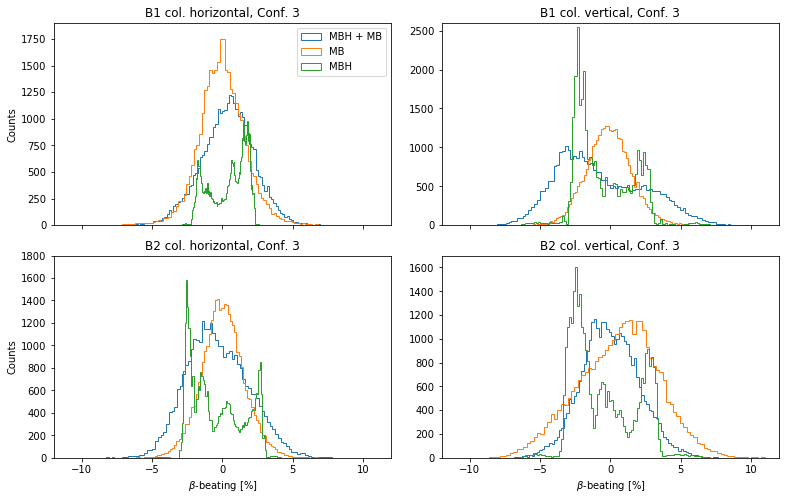

B1 MBH+MB  hor 1.9
B1 MB      hor 1.7
B1 MBH     hor 1.3
B2 MBH+MB  hor 2.2
B2 MB      hor 1.5
B2 MBH     hor 1.9

B1 MBH+MB  ver 3.1
B1 MB      ver 1.6
B1 MBH     ver 2.0
B2 MBH+MB  ver 2.1
B2 MB      ver 2.9
B2 MBH     ver 2.3


In [109]:
# fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, sharex=True,figsize=[10,7])
fig, ((ax1,ax3), (ax2,ax4)) = plt.subplots(2, 2, sharex=True,figsize=[13,8])

conf="Conf. 3"
mode="col"

ax1.hist(bb11x*100,bins=100,histtype='step',label='MBH + MB')
ax1.hist(bb12x*100,bins=100,histtype='step',label='MB')
ax1.hist(bb13x*100,bins=100,histtype='step',label='MBH')
ax1.set_title('B1 {0}. horizontal, {1}'.format(mode,conf))
ax1.legend()

ax2.hist(bb21x*100,bins=100,histtype='step')
ax2.hist(bb22x*100,bins=100,histtype='step')
ax2.hist(bb23x*100,bins=100,histtype='step')
ax2.set_title('B2 {0}. horizontal, {1}'.format(mode,conf))

ax3.hist(bb11y*100,bins=100,histtype='step')
ax3.hist(bb12y*100,bins=100,histtype='step')
ax3.hist(bb13y*100,bins=100,histtype='step')
ax3.set_title('B1 {0}. vertical, {1}'.format(mode,conf))

ax4.hist(bb21y*100,bins=100,histtype='step')
ax4.hist(bb22y*100,bins=100,histtype='step')
ax4.hist(bb23y*100,bins=100,histtype='step')
ax4.set_title('B2 {0}. vertical, {1}'.format(mode,conf))


for ax in [ax2, ax4]:
    ax.set_xlabel(r'$\beta$-beating [%]')
    
for ax in [ax1, ax2]:
    ax.set_ylabel(r'Counts')
    
ax1.set_xlim(-12,12)
ax2.set_xlim(-12,12)

ax1.set_ylim(0,1900)
ax2.set_ylim(0,1800)    
ax3.set_ylim(0,2600)
ax4.set_ylim(0,1700)    
    
plt.subplots_adjust(wspace=0.15, hspace=0.15)
plt.savefig('output/bbeat_collision_conf3.pdf',bbox_inches='tight')
plt.show()
print_summary()

In [20]:
description = ['B1 MBH+MB', 'B1 MB', 'B1 MBH', 'B2 MBH+MB', 'B2 MB', 'B2 MBH']
datasets    = [bb11x,bb12x,bb13x,bb21x,bb22x,bb23x]

for _i in range(len(description)):
    print(description[_i])
    print(datasets[_i].std())
    print('')

B1 MBH+MB
0.0187565849572812

B1 MB
0.01687933168607169

B1 MBH
0.01322960335415794

B2 MBH+MB
0.021949823003878374

B2 MB
0.015355391864280562

B2 MBH
0.01871153697490935

